<a href="https://colab.research.google.com/github/cafechungkhoan/lyd-report/blob/main/VPB_Report_16092021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LYD - Comment Sentiment Analysis**

*LYD là hệ thống áp dụng Deep Learning dùng để quét, tóm tắt, phân tích và dự báo cảm xúc của nhà đầu tư. Với mục đích hỗ trợ nghiệp vụ tư vấn IR (Investor Relation)*

**Dữ liệu input**: 
là dữ liệu bình luận (text) của nhà đầu tư trên mạng xã hội và các diễn đàn chứng khoán lớn. Quy mô tracking 700k user

**Các Model áp dụng**: 
Bert, transformer, SVM, PhoBERT 

### **LYD trả lời các câu hỏi chính**:
* **Mã cổ phiếu của doanh nghiệp có được nhà đầu tư yêu thích không?** (Áp dụng Text Classification Model xác định trạng thái cảm xúc của nhà đầu tư hiện tại là tích cực (hài lòng) hay tiêu cực (không hài lòng) về cổ phiếu YYY được xác định trước.)
* **Nhà đầu tư đang bàn tán gì về cổ phiếu doanh nghiệp?** (Áp dụng Topic Cluster Model phân loại các chủ đề chính cơ bản / kĩ thuật / thời sự & vĩ mô / tin đồn) của cổ phiếu YYY được xác định trước.)
* **Đâu là chủ đề nhà đầu tư thích nhất về cổ phiếu?** (Áp dụng BERT Text Summarize để tóm tắt nội dung comment)

---

In [ ]:
#@title Input Parameter
a = input('Nhập mã cần search: ')
b= input('Nhập giới hạn comment: ')

Nhập mã cần search: vpb
Nhập giới hạn comment: 1000


In [ ]:
pip install underthesea   

standardized data...
Processing step 1: Lower Case, Removed Https tag, Removed Stopwords
CPU times: user 3.47 ms, sys: 82 µs, total: 3.55 ms
Wall time: 3.61 ms
CPU times: user 10.7 ms, sys: 939 µs, total: 11.7 ms
Wall time: 11.7 ms
CPU times: user 2.85 ms, sys: 0 ns, total: 2.85 ms
Wall time: 2.87 ms
Done
2021-09-16 03:35:17,877 https://github.com/undertheseanlp/playground/releases/download/1.3.x/sa_svm_vlsp2016-sa_20210107.zip not found in cache, downloading to /tmp/tmphnophp7k


100%|██████████| 2234880/2234880 [00:00<00:00, 6263868.27B/s]

2021-09-16 03:35:18,487 copying /tmp/tmphnophp7k to cache at /root/.underthesea/models/sa_svm_vlsp2016-sa_20210107.zip
2021-09-16 03:35:18,494 removing temp file /tmp/tmphnophp7k


Processing step 3: Tokenize
Processing step 4: POS Tagging
Processing step 5: Entity Regconize
Processing step 6: Vectorize PhoBERT
Process model SVM....
>>> Done


## **Phân tích người tham gia bình luận**
*   Xác định có vấn đề seeding bình luận ảo không
*   Xác định nhóm người theo sentiment



Số bình luận =  1000 . Số người tham gia bình luận =  463 . Median comment / user =  1.0


Text(0.5, 1.0, 'ViolinPlot số lượng comment của người tham gia bình luận')

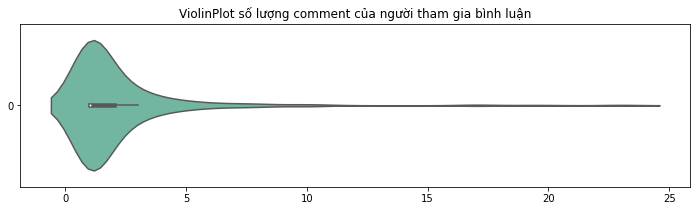

In [ ]:
#@title    

import matplotlib.pyplot as plt
import seaborn as sns
so_nguoi = data.groupby('user.name').count().reset_index()
print('Số bình luận = ',len(data),'. Số người tham gia bình luận = ', len(so_nguoi),'. Median comment / user = ', so_nguoi['originalContent'].median())
plt.figure(figsize = (12,3))
sns.violinplot(data=so_nguoi['originalContent'], orient="h", palette="Set2").set_title('ViolinPlot số lượng comment của người tham gia bình luận')

## **Network Grahp sentiment theo user**

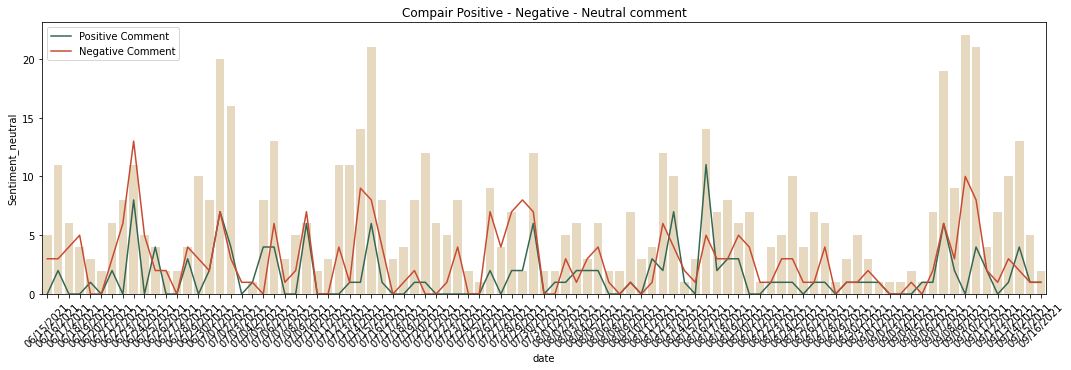

In [ ]:
#@title Visualize Sentiment Analysis { vertical-output: true }
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

x = data1['Sentiment_positive']
y = data1['date']
z = data1['Sentiment_negative']
neu = data1['Sentiment_neutral']

import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (18,5))
plt.xticks(rotation=45)
plt.title('Compair Positive - Negative - Neutral comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="#346751")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = '#C84B31')
sns.barplot(x=y,y =neu, label ="Neutral Comment", color = '#ECDBBA')

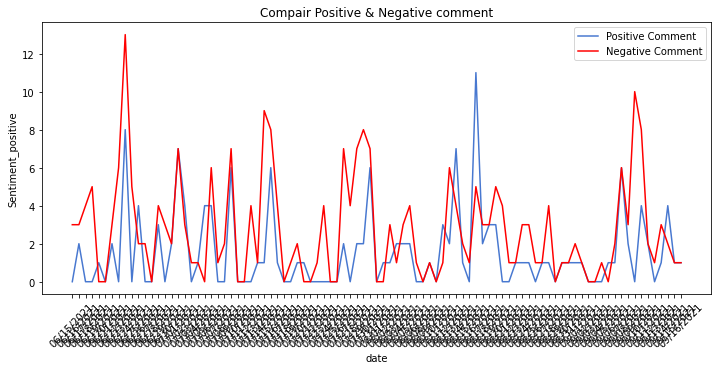

In [ ]:
#@title Drop Neutral { vertical-output: true }
import seaborn as sns
sns.set_color_codes("muted")
plt.figure(figsize = (12,5))
plt.xticks(rotation=45)
plt.title('Compair Positive & Negative comment')
sns.lineplot(x=y, y=x,label="Positive Comment", color="b")
sns.lineplot(x=y,y =z, label ="Negative Comment", color = 'red')

Text(0.5, 1.0, 'Topic Tin đồn')

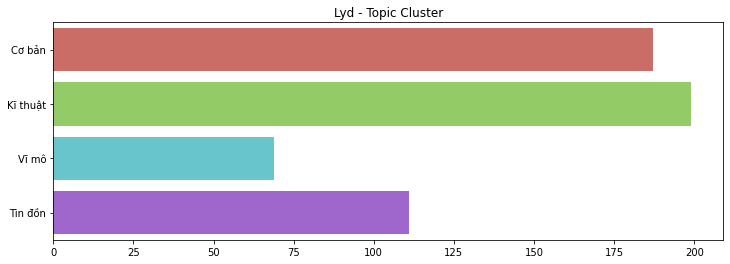

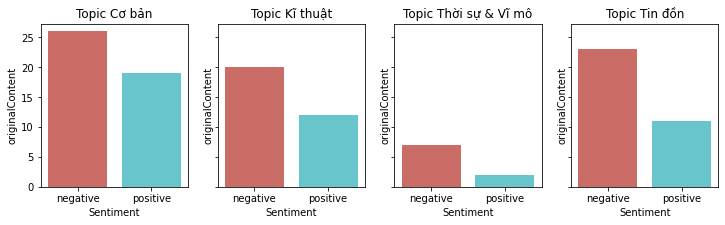

In [ ]:
#@title Số người comment từng loại { run: "auto", vertical-output: true }
a = co_ban.groupby('user.name')
print('Số comment cơ bản = ',len(co_ban),'. Số người tham gia comment = ', len(a))
b = ki_thuat.groupby('user.name')
print('Số comment kĩ thuật = ',len(ki_thuat),'. Số người tham gia comment = ', len(b))
c = vi_mo.groupby('user.name')
print('Số comment thời sự & vĩ mô = ',len(vi_mo),'. Số người tham gia comment = ', len(c))
d = tin_don.groupby('user.name')
print('Số comment tin đồn = ',len(tin_don),'. Số người tham gia comment = ', len(d))

Số comment cơ bản =  187 . Số người tham gia comment =  111
Số comment kĩ thuật =  199 . Số người tham gia comment =  105
Số comment thời sự & vĩ mô =  69 . Số người tham gia comment =  54
Số comment tin đồn =  111 . Số người tham gia comment =  76


## **Graph Knowledge**

## **Text Summarization using BERT**

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
#@title Text Summarize Result { vertical-output: true }
# tin_don = pd.DataFrame(tin_don)
# for i in tin_don['originalContent']:
#     result = model(i, min_length = 1)
#     full = ''.join(result)
#     print('>>>',full)

,index,originalContent,date,user.name,Content_Tokenize,Text_Summarize
0,4,"Bank điều chỉnh đến bao giờ?\n\nHầu hết cổ phiếu ngân hàng đều có chu kỳ tăng giá 66 tuần từ đáy 30/3/2020, theo nguyên lý sóng Eliott, nhịp điều chỉnh kéo tối thiểu 22 tuần để hoàn thành một chu kỳ, tức tuần thứ 2 của tháng 12/2021. Trong thời gian đó, cổ phiếu có thể sideway hoặc điều chỉnh đi lên từ đáy. \n\nĐịnh giá TTCK đã rẻ đi nhiều sau đợt điều chỉnh 2 tháng qua và thấp hơn so với các thị trường cùng khu vực. Khi cổ phiếu giảm giá hoặc tạo đáy là cơ hội để nhà đầu tư mua vào. Khối ngoại đã ngừng bán, tự doanh liên tục mua gom. Để thị trường kéo lên 1420 hoặc vượt đỉnh sự đồng thuận đánh lên của nhóm Bank là không thể thiếu.\n\nThông tư 14/2021/TT-NHNN cho phép các doanh nghiệp được kéo dài thời gian cơ cấu khoản nợ thêm 06 tháng đến 30/6/2022, tuy nhiên, các ngân hàng vẫn phải TUÂN THỦ QUY ĐỊNH TRÍCH LẬP DỰ PHÒNG. Điều này có nghĩa là với những Ngân hàng có chất lượng tài sản kém, có nhiều khoản nợ xấu sẽ không được hưởng lợi về kết quả kinh doanh theo quy định của Thông tư này.\n\nChiến lược mua cổ phiếu ngân hàng khi ở vùng giá hấp dẫn cân nhắc các yếu tố sau:\n\n1. Quản trị rủi ro tốt đối với tài sản nợ xấu: xem xét các Ngân hàng có tỷ lệ dự phòng bao nợ xấu cao, đặc biệt ngân hàng đã trích vượt dự phòng so với quy định trong Q2/2021.\n\n2. Khả năng tăng NIM (thu nhập lãi thuần) khi doanh nghiệp có nhu cầu cực lớn khi kết thúc các chỉ thị giãn cách: lựa chọn các Ngân hàng có CASA (tiền gửi không kỳ hạn/tiền gửi kỳ hạn) cao.\n\n3. Nhóm ngân hàng bán lẻ do triển vọng tăng trưởng sau giãn cách.\n\nP/s: Dự báo giá cổ phiếu ngân hàng có thể tạo đáy khi công bố thông tin BCTC Q3/2021. Hiện tại, việc cần làm là đứng ngoài quan sát.",09/15/2021,Hoang Manh,điều_chỉnh bao_giờ hầu_hết cổ_phiếu ngân_hàng chu_kỳ tăng_giá nguyên_lý eliott điều_chỉnh tối_thiểu hoàn_thành chu_kỳ thời_gian cổ_phiếu có_thể điều_chỉnh định_giá điều_chỉnh thị_trường khu_vực cổ_phiếu giảm_giá cơ_hội nhà_đầu_tư liên_tục thị_trường đồng_thuận không_thể thông_tư 142021 ttnhnn cho_phép doanh_nghiệp kéo_dài thời_gian cơ_cấu 3062022 tuy_nhiên ngân_hàng tuân_thủ quy_định dự_phòng ngân_hàng chất_lượng tài_sản kết_quả kinh_doanh quy_định thông_tư chiến_lược cổ_phiếu ngân_hàng hấp_dẫn cân_nhắc yếu_tố quản_trị rủi_ro đối_với tài_sản xem_xét ngân_hàng tỷ_lệ dự_phòng đặc_biệt ngân_hàng dự_phòng quy_định khả_năng thu_nhập doanh_nghiệp nhu_cầu kết_thúc chỉ_thị lựa_chọn ngân_hàng hạntiền kỳ_hạn ngân_hàng bán_lẻ triển_vọng tăng_trưởng dự_báo_giá cổ_phiếu ngân_hàng có_thể công_bố thông_tin hiện_tại quan_sát,"Bank điều chỉnh đến bao giờ? Trong thời gian đó, cổ phiếu có thể sideway hoặc điều chỉnh đi lên từ đáy. 2. Nhóm ngân hàng bán lẻ do triển vọng tăng trưởng sau giãn cách."
1,7,"Có lẽ bây giờ dòng tiền thông minh và thận trọng hơn trước rất nhiều. Họ đang tập trung vào midcap và penny. Các bạn sẽ lập luận rằng, VNI không có Bank thì sẽ down, gần đúng chứ chưa chuẩn xác. Như hôm nay đó, các bank vẫn lên xuống biên độ hẹp trong khi các mã khác vẫn tăng mạnh. Vì sao ư? Đó có thể là tính toán của tạo lập hay bộ phận cá mập nào đó. Tôi suy đoán rằng, vì Bank đã tăng quá cao nửa đầu năm và tác động của nó tới chỉ số VNI quá mạnh, do vậy, họ chỉ để Bank ở trạng thái tăng giảm nhẹ. Ôm lâu có thể thơm đó, nhưng lâu là bao giờ? Thôi thì tuỳ target của mỗi người, nhưng nếu ôm 6 tháng mà Bank chỉ nhích 5-10% thì quả thực không đáng lúc tranh tối tranh sáng năm nay. \nTúm váy lại, biết thời biết thế là trang tuấn kiệt, chơi mã nào dòng nào miễn an tâm, an toàn và có lợi nhuận là được. Nhưng đừng bảo thủ mà lựa chọn vùng an toàn thái quá để rồi cuối cùng trắng tay.",09/15/2021,Nguyen Văn Anh,có_lẽ bây_giờ thông_minh thận_trọng tập_trung lập_luận chuẩn_xác hôm_nay biên_độ vì_sao có_thể tính_toán tạo_lập bộ_phận cá_mập suy_đoán tác_động chỉ_số do_vậy trạng_thái có_thể bao_giờ quả_thực váy tuấn_kiệt an_tâm an_toàn lợi_nhuận bảo_thủ lựa_chọn an_toàn cuối_cùng trắng_tay,"Có lẽ bây giờ dòng tiền thông minh và thận 